In [1]:
import pandas as pd
import os
import numpy as np
import pickle

import matplotlib.pyplot as plt
from statistics import mean
import math
from math import log
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5


In [20]:
pkl_file = open('blineled.pkl', 'rb')
mydata = pickle.load(pkl_file)


In [21]:
mydata['ch0'].shape

(625, 2000)

In [22]:
#for key, value in mydata.items():
#    print(key, "=", value )

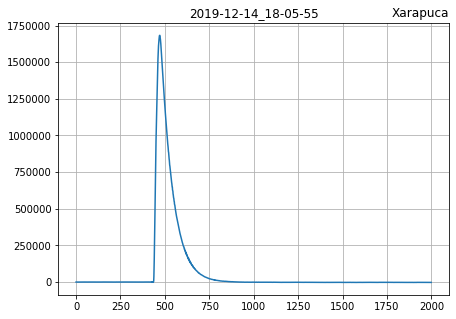

In [33]:
plt.title('2019-12-14_18-05-55')
#plt.title('one event', loc='left')
plt.title('Xarapuca', loc='right')
#plt.yscale('log')
plt.grid(True)
#t = np.arange(len(mydata['ch2']))
#plt.xlim(0, 400)
#plt.ylim(-350, 350)
plt.plot((mydata['ch11']).sum(axis=0))
plt.show()

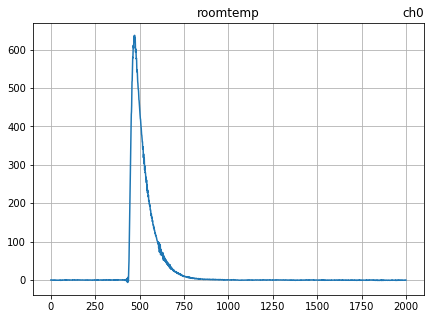

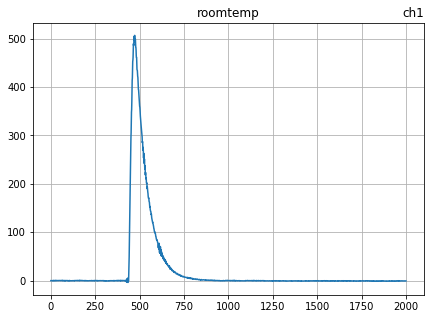

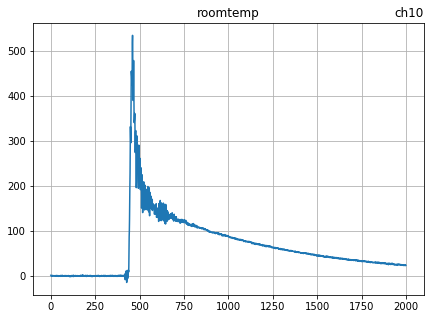

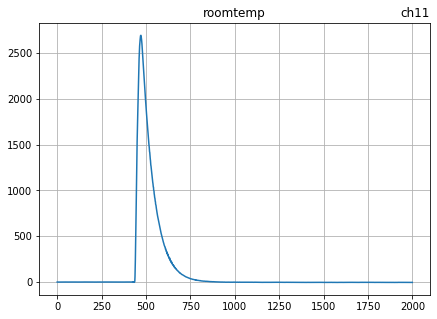

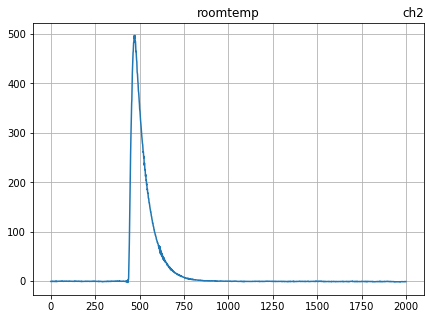

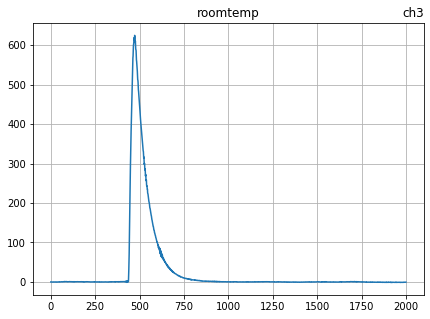

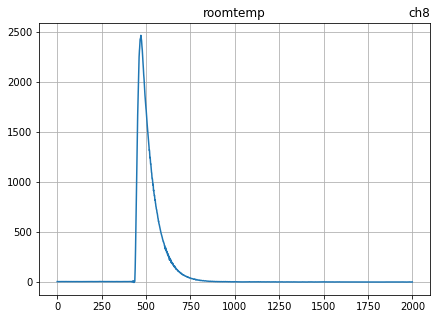

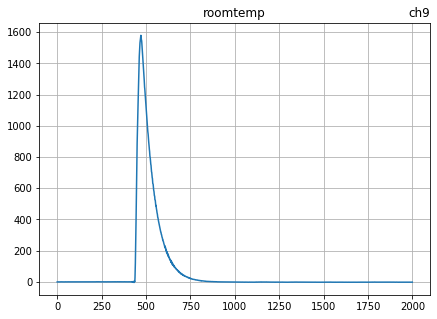

In [27]:
rcParams['figure.figsize'] = 7, 5
for key, value in mydata.items():
    data=mydata[key].mean(axis=0)
    
    plt.grid(True)
    t = np.arange(len(data))
    #plt.yscale('log')
    #plt.xlim(1500, 2200)
    #plt.ylim(0.00001, 10000)
    plt.title('roomtemp')
    #plt.title('one event', loc='left')
    plt.title(key, loc='right')    
    
    plt.plot(data)
    plt.show()


In [ ]:
bline_dict = {}

for key, value in mydata.items():
    baseline = mydata[key][0:mydata[key].size,1:100].mean(axis=1) 
    print(mydata[key].size)
    Nevent=(baseline.size)
    print('nevent',Nevent)
    blines=baseline.reshape(baseline.size,1)
    data=(mydata[key] - blines)
    bline_dict.update({key: data})


In [ ]:
bline_dict

In [ ]:
data =(mydata['ch0'] - arr).mean(axis=0)
data

In [ ]:
plt.title('2019-12-14_18-05-55')
plt.title('one event', loc='left')
plt.title('Xarapuca', loc='right')
#plt.yscale('log')
plt.grid(True)
t = np.arange(len(data))
plt.xlim(1500, 2200)
plt.ylim(-10, 10)
plt.plot(t,data)
plt.show()

In [ ]:
plt.title('2019-12-14_18-05-55')
plt.title('one event', loc='left')
plt.title('Xarapuca', loc='right')
#plt.yscale('log')
plt.grid(True)
t = np.arange(len(data))
plt.xlim(0, 100)
plt.ylim(-1, 1)
plt.plot(t,data)
plt.show()

In [ ]:
plt.title('2019-12-14_18-05-55')
plt.title('one event', loc='left')
plt.title('Xarapuca', loc='right')
#plt.yscale('log')
plt.grid(True)
t = np.arange(len(data))
plt.xlim(0, 2000)
#plt.ylim(-2000, 2000)
plt.plot(t,data)
plt.show()

In [ ]:
from scipy import signal

x_detrended = signal.detrend(data)
plt.plot(x_detrended)
plt.show()

In [ ]:
plt.grid(True)
plt.plot(data)
plt.yscale('log')
plt.show()

In [ ]:
plt.grid(True)
plt.xlim(365, 374)
#plt.ylim(-20, 20)
plt.plot(data)
plt.show()

In [ ]:
plt.title('2019-12-14_18-05-55')
plt.title('one event', loc='left')
plt.title('Xarapuca', loc='right')
plt.yscale('log')
plt.grid(True)
#t = np.arange(len(data))
plt.xlim(0, 2000)
plt.ylim(0.0000000001, 100000)
plt.plot(data)
plt.show()

In [ ]:
avrg=np.average(data)
avrg

In [ ]:
#plt.plot((data))
plt.title('2019-12-14_18-05-55')
plt.title('one event', loc='left')
plt.title('Xarapuca', loc='right')
plt.yscale('log')
plt.grid(True)
plt.xlim(0, 2000)
#plt.ylim(0.01, 10000000)
plt.plot(data)
plt.show()

In [ ]:
bline=mydata['ch0'][:200].mean(axis=0)
bline

In [ ]:
bline.shape

In [ ]:
avrg=np.average(data[350:700])
avrg

In [ ]:
plt.plot(data/avrg)
plt.title('Average')
plt.title('one event', loc='left')
plt.title('Xarapuca Ch0', loc='right')
plt.grid(True)
plt.yscale('symlog')
plt.xlim(372, 390)
plt.ylim(0, 10)
plt.show()

In [ ]:
from IPython.display import Image

## fit
    coeffs[0] is B (noise)
    coeffs[1] is A (amplitude)
    coeffs[2] is \mu (center)
    coeffs[3] is \sigma (width)
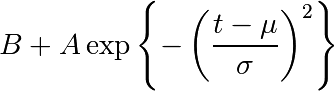
x0 = np.array([3, 30, 15, 1], dtype=float)

In [ ]:
def model(t, coeffs):
    return coeffs[0] + coeffs[1] * np.exp( - ((t-coeffs[2])/coeffs[3])**2 )



In [ ]:
x0 = np.array([1, 10, 750, 1], dtype=float)

In [ ]:
def residuals(coeffs, y, t):
    return y - model(t, coeffs)


In [ ]:
from scipy.optimize import leastsq
x, flag = leastsq(residuals, x0, args=(data/avrg, t))
print (x)

In [ ]:
plt.plot(t, data/avrg, t, model(t, x)) 
plt.legend(['waveform', 'model']) 
plt.show() 

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [ ]:
xdata = data/avrg
y = func(xdata, 2.5, 1.3, 0.5)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'r-', label='data')


In [ ]:
xdata = data/avrg
y = func(xdata, 2.5, 1.3, 0.5)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')
popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
#popt
plt.plot(xdata, func(xdata, *popt), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
popt

In [ ]:
from scipy.signal import find_peaks
peaks,_=find_peaks(data,height=0)
peaks

In [ ]:
%matplotlib inline
plt.plot(data)
plt.plot(peaks,data[peaks],"x")
plt.plot(np.zeros_like(data),"-",color="gray")
plt.show()

In [ ]:


border=np.sin(np.linspace(0,3*np.pi,data.size))
peaks,_=find_peaks(data,height=[border,-border])
plt.plot(data)
plt.plot(peaks,data[peaks],"x")
plt.plot(border,"-",color="gray")
plt.plot(-border,":",color="gray")
plt.show()



In [ ]:
peaks,_=find_peaks(data,distance=150)
np.diff(peaks)
print(peaks)

In [ ]:
from scipy.signal import peak_prominences
peaks_all,_=find_peaks(data)
prominences,left_base,right_base=peak_prominences(data,peaks_all)
print(prominences)

In [ ]:
#https://github.com/mjDelta/scipy.signal-Study-Records
from sklearn.cluster import KMeans
clf=KMeans(n_clusters=2).fit(np.expand_dims(prominences,1))
y=clf.predict(np.expand_dims(prominences,1))
print(set(y))
centers=clf.cluster_centers_
print(centers)

In [ ]:
plt.plot(data)
plt.plot(peaks_all[y==False],data[peaks_all[y==False]],"x")
plt.plot(peaks_all[y==True],data[peaks_all[y==True]],"x")
plt.show()

In [ ]:
border=np.sin(np.linspace(0,3*np.pi,data.size))
peaks,_=find_peaks(data,height=[border,-border])
plt.plot(data)
plt.plot(peaks,data[peaks],"x")
plt.plot(border,"-",color="gray")
plt.plot(-border,":",color="gray")
plt.show()

In [ ]:
from scipy import signal
x_detrended = signal.detrend(sig)
plt.plot(x_detrended)

In [ ]:
peak_freq = sample_freq[power.argmax()]
peak_freq

In [ ]:
sig.mean()

In [ ]:
a = np.ma.array([1., 2., 3., 4.], mask=[False, False, True, True])

In [ ]:
a = np.ma.array([1., 2., 3., 4.], mask=[False, False, True, True])

x = np.ma.arange(6.).reshape(3, 2)

In [ ]:
x

In [ ]:
avg, sumweights = np.ma.average(x, axis=0, weights=[1, 2, 3],returned=True)

In [ ]:
avg